# GEMSTONE PRICE PREDICTION

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**Carat** is a measure of diamond weight. One carat is equivalent to 0.2 grams.

**Clarity** refers to how clear a diamond is. Diamonds often contain imperfections like cracks or mineral deposits. The fewer and less noticeable a diamond’s imperfections, the better its clarity.

clarity contains 8 ordered levels, from “I1” (the worst) to “IF” (the best).

**Color** refers to the color of the diamond. Colorless diamonds are considered better than diamonds with a yellow tint. diamonds contains diamonds of 7 different colors, represented by different letters. “D” - “F” diamonds are considered colorless, while “G” - “J” diamonds have a very faint color.

**Cut** refers to how a rough diamond is shaped into a finished diamond. Better cuts create more symmetrical and luminous diamonds. cut has 5 ordered levels: “Fair,” “Good,” “Very Good,” “Premium,” “Ideal.”

**x, y, z, depth, and table** are various measures of a diamond’s size, in millimeters.

Data Exploration

In [ ]:
import pandas as pd
df = pd.read_csv("/content/train.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
df.shape

(193573, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193572 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193569 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193572 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [ ]:
df = df.drop(labels=['id'],axis=1)

In [ ]:
df.isna().sum()

carat      0
cut        1
color      0
clarity    0
depth      4
table      0
x          0
y          1
z          0
price      0
dtype: int64

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [ ]:
mod_val = df[col].mode()
df['cut'].fillna(df['cut'].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Detecting the diamonds with 0s for dimensions 'x','y','z' which is impossible.

In [ ]:
df[
  (df["x"] == 0) |
  (df["y"] == 0) |
  (df["z"] == 0)
].shape[0]

10

There are only 10 values having no dimensions so we will remove them

In [ ]:
df = df.drop(df[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)].index)

In [ ]:
df[
  (df["x"] == 0) |
  (df["y"] == 0) |
  (df["z"] == 0)
].shape[0]

0

In [ ]:
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Categorical Columns : {categorical_columns}')

Categorical Columns : ['cut', 'color', 'clarity']


In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820565,57.227675,5.715312,5.720081,3.534246,3969.155414
std,0.462688,1.081701,1.918844,1.109422,1.102318,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [ ]:
df.describe(include='O')

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [ ]:
df.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

## EDA

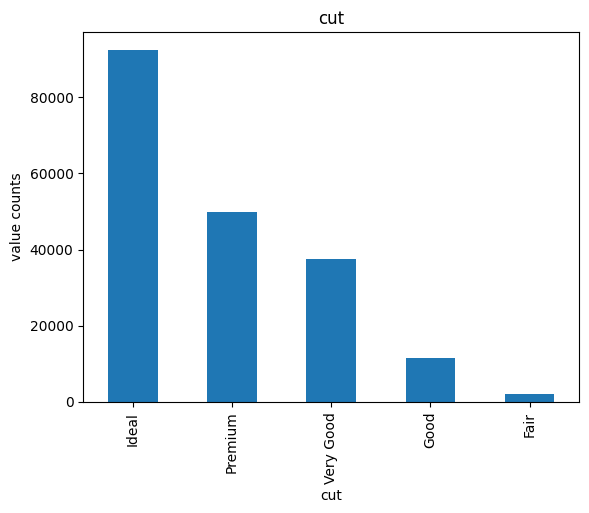

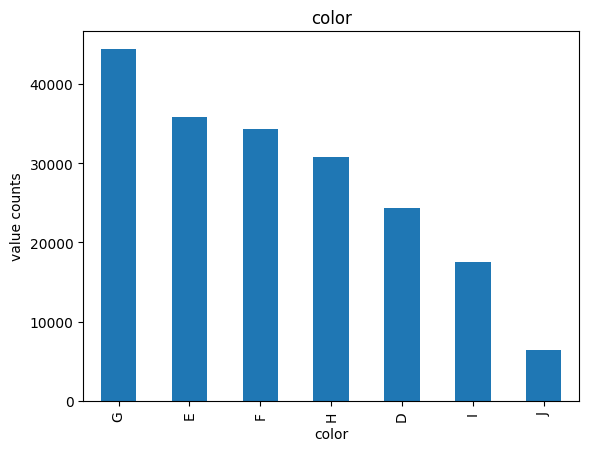

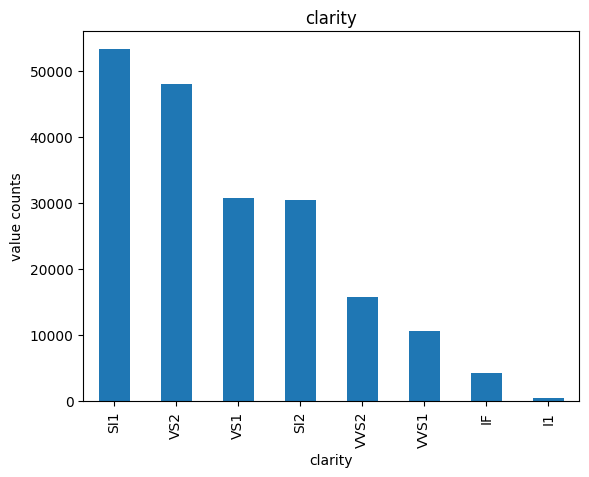

In [ ]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

The best clarity classes are relatively rare, and most diamonds are in the SI1
category, the third worst.

There are also very few diamonds with the worst clarity, I1.

Interestingly, cut is very different.

Ideal cut diamonds are very common, and the number of diamonds in each category decreases as quality decreases.

Maybe cut is a feature that diamond manufacturers have more control over, whereas clarity is more a feature of the raw diamond.

<ipython-input-36-f0d6ff25e24f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='cut',y='price',palette = "Blues")


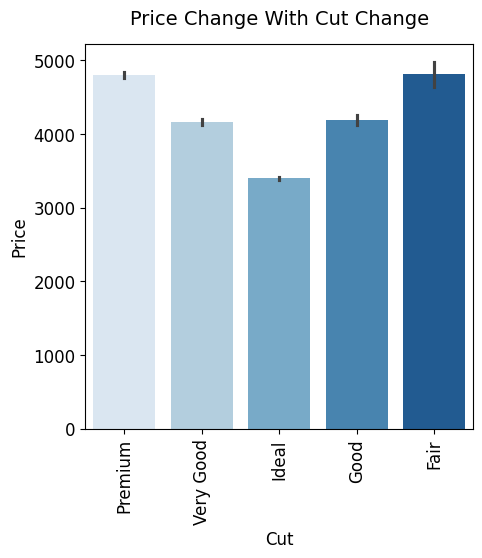

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='cut',y='price',palette = "Blues")
plt.title("Price Change With Cut Change",fontsize=14,pad=14)
plt.xlabel('Cut',fontsize=12)
plt.ylabel('Price',fontsize=12)

plt.tick_params(axis='x',which='major',labelsize=12,rotation=90)
plt.tick_params(axis='y',which='major',labelsize=12)

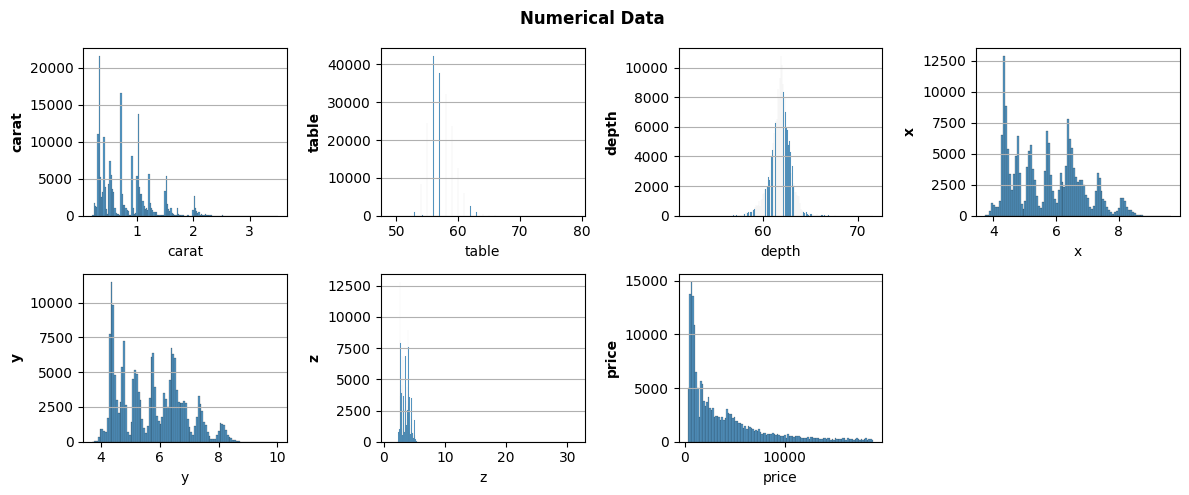

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols=4, figsize=(12,5))

row = 0
col = 0
for i, cc in enumerate(['carat', 'table', 'depth', 'x', 'y', 'z', 'price']):
    ax = sns.histplot(data=df, x=cc, ax=axs[row, col])
    ax.yaxis.grid()
    ax.set_ylabel(cc, weight='bold')

    if col == 3:
        col = 0
        row += 1
    else:
        col += 1

fig.suptitle('Numerical Data ', weight='bold')
fig.delaxes(axs[1][3])
fig.tight_layout()
plt.show()

Detecting Correlation using HeatMap

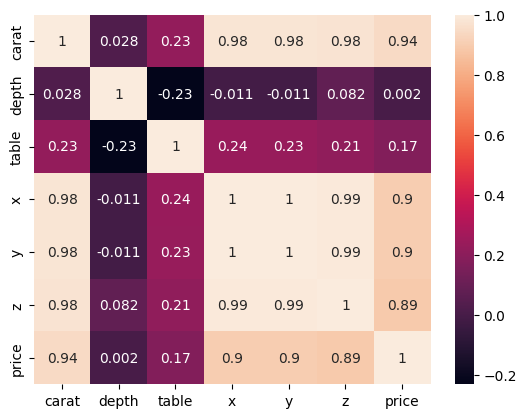

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

**price, carat, x, y and z are strongly correlated to each other**

**table mildly correlated similarly to all other categories**

**depth is not well correlated to anything else**

**Mapping of categorical columns**

In [ ]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [ ]:
df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

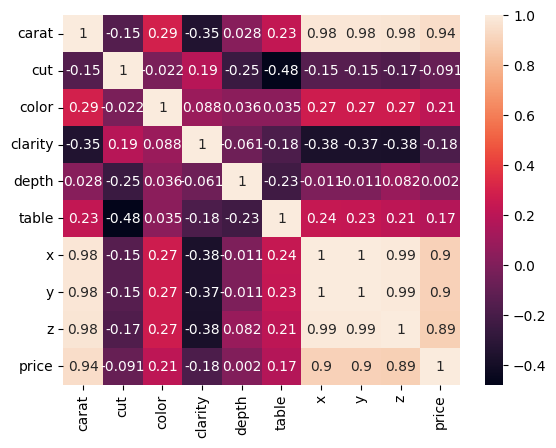

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


Mutual information is often used for feature selection, where it helps identify the most relevant features for a particular task.

High mutual information between a feature and the target variable indicates that the feature carries valuable information about the target, making it potentially useful for prediction or classification tasks

In [ ]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

[1.82414633 0.09165873 0.28496022 0.39716471 0.04764448 0.10933899
 1.67474392 1.66656747 1.61782808]


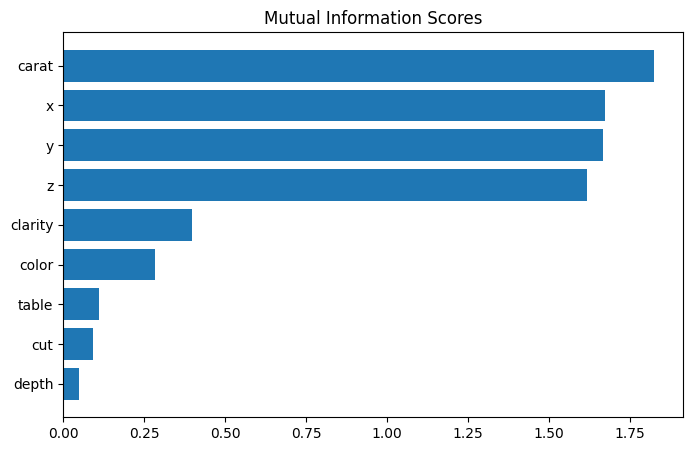

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Assuming X and Y are defined as per your code
# Replace it with your actual data
X = df.drop(labels=['price'], axis=1)
Y = df['price']

# Calculate mutual information scores between features in X and the target variable Y
mi_scores = mutual_info_regression(X, Y)

def plot_mi_scores(scores):
    scores = pd.Series(scores, index=X.columns)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

# Print and plot the mutual information scores
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


From here we can see the most affecting features are **carat, x, y and z**

Detecting the outliers

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price'], dtype='object')


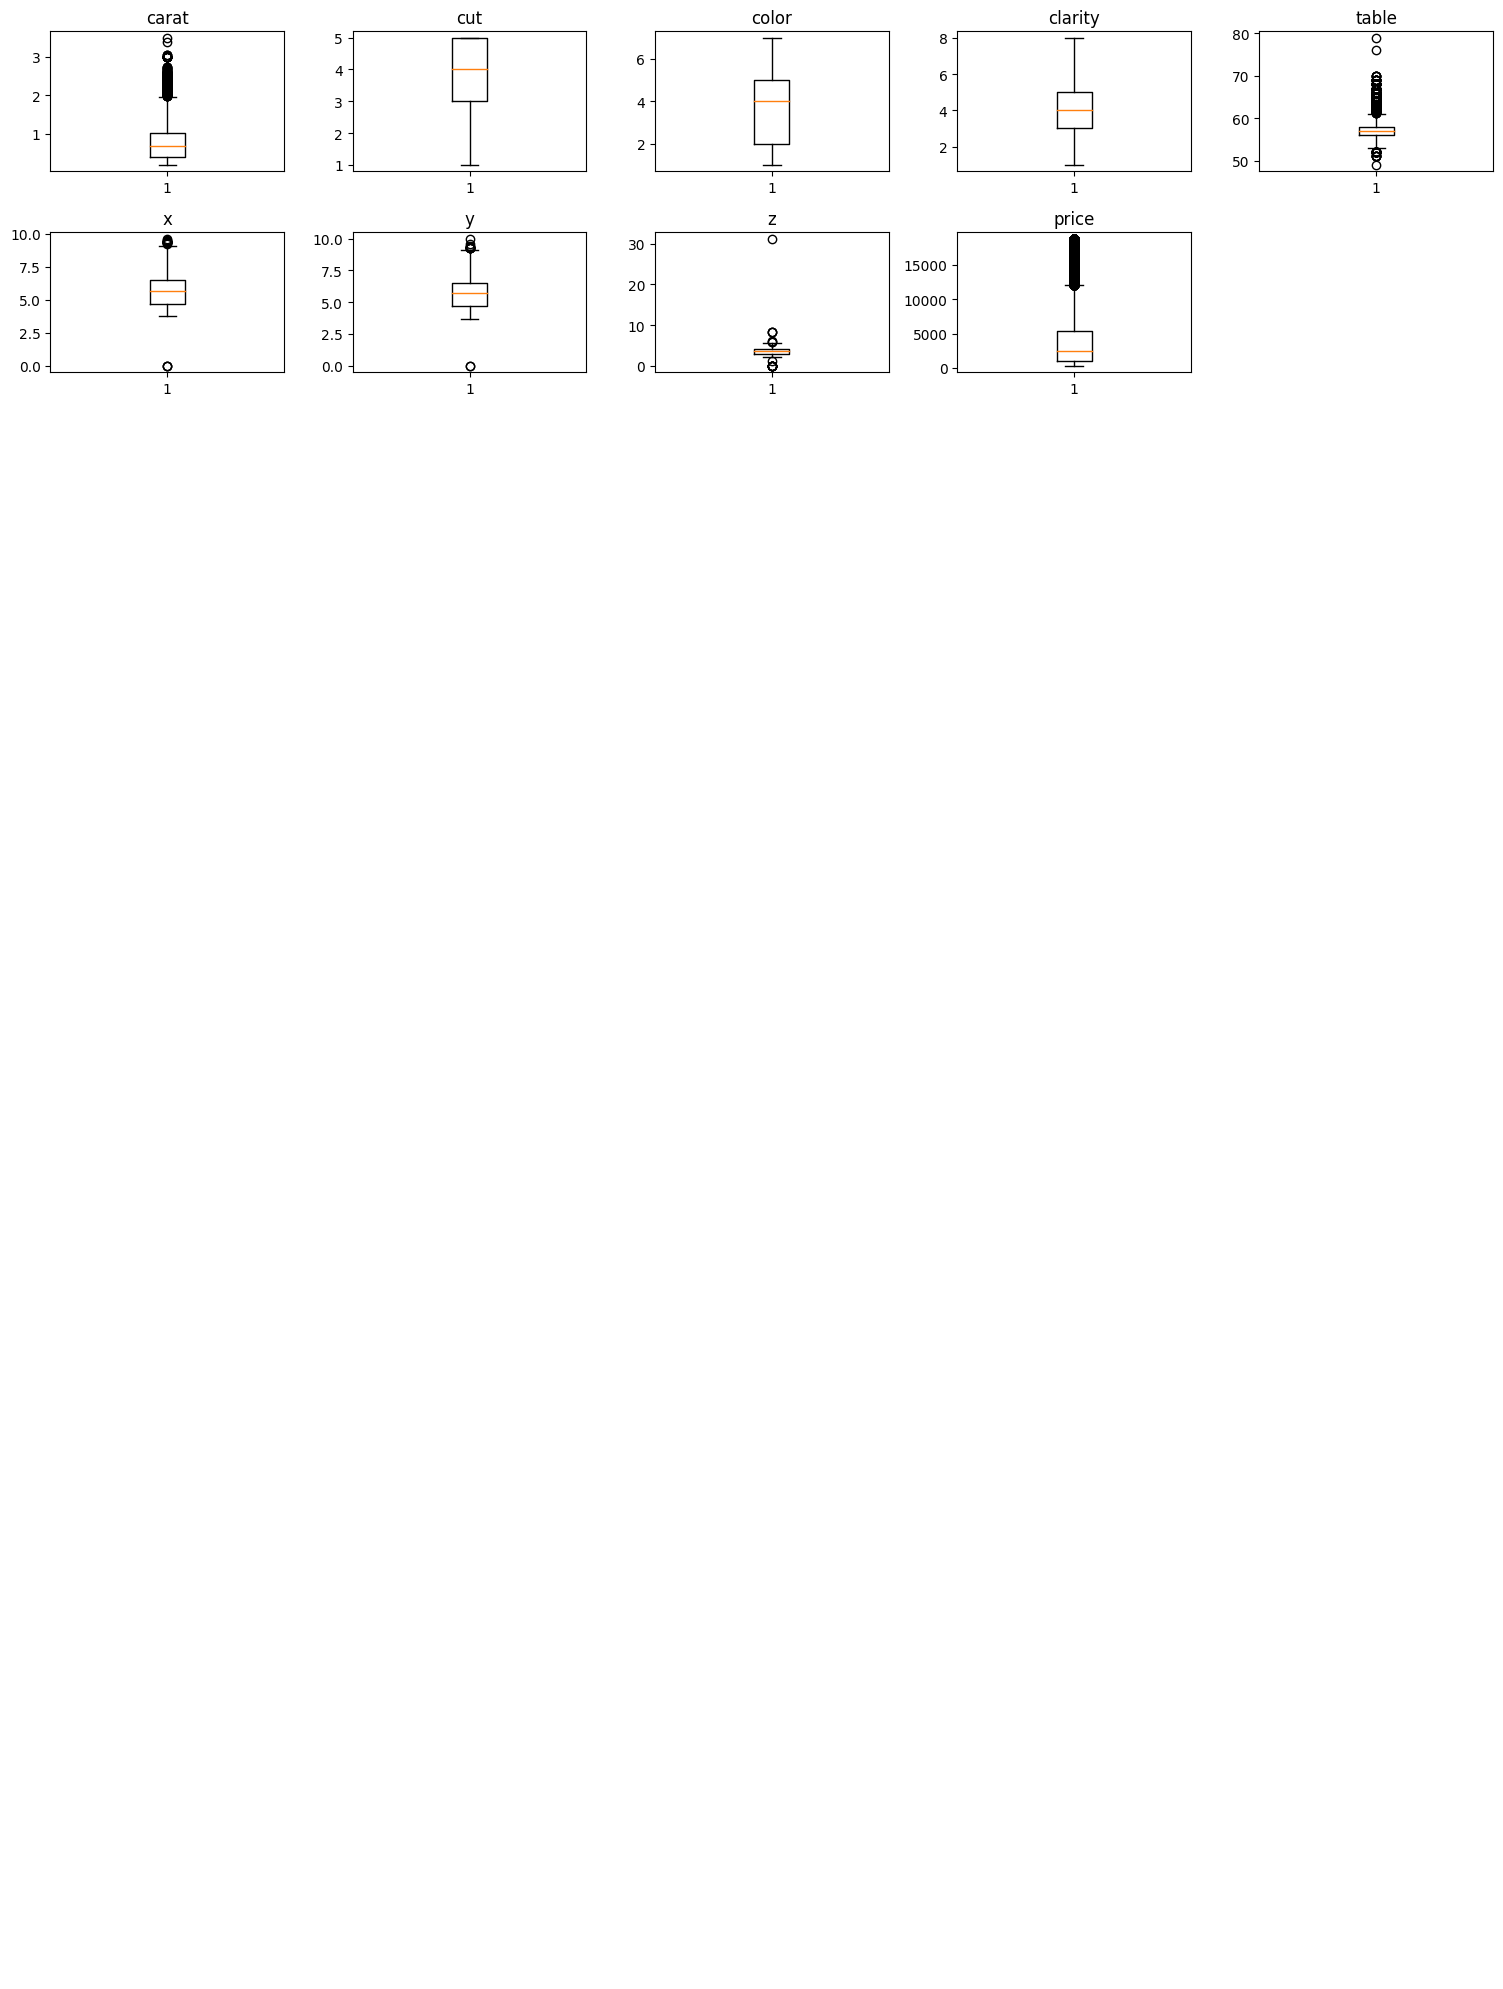

In [ ]:
numerical_cols=df.columns[df.dtypes !='object']
print(numerical_cols)

fig, axes = plt.subplots(10, 5, figsize=(15, 20))
axes = axes.flatten()
# Creating boxplot
for i, column in enumerate(numerical_cols):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Removing the unused plots
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

x and y are similar, z mean/median is slightly less than x and y, with minimal outliers


Implies a small handful of extremely long gems but most are short and wide.

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
# Calculate the interquartile range (IQR) for each column
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Removal of outliers using IQR method

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price'], dtype='object')


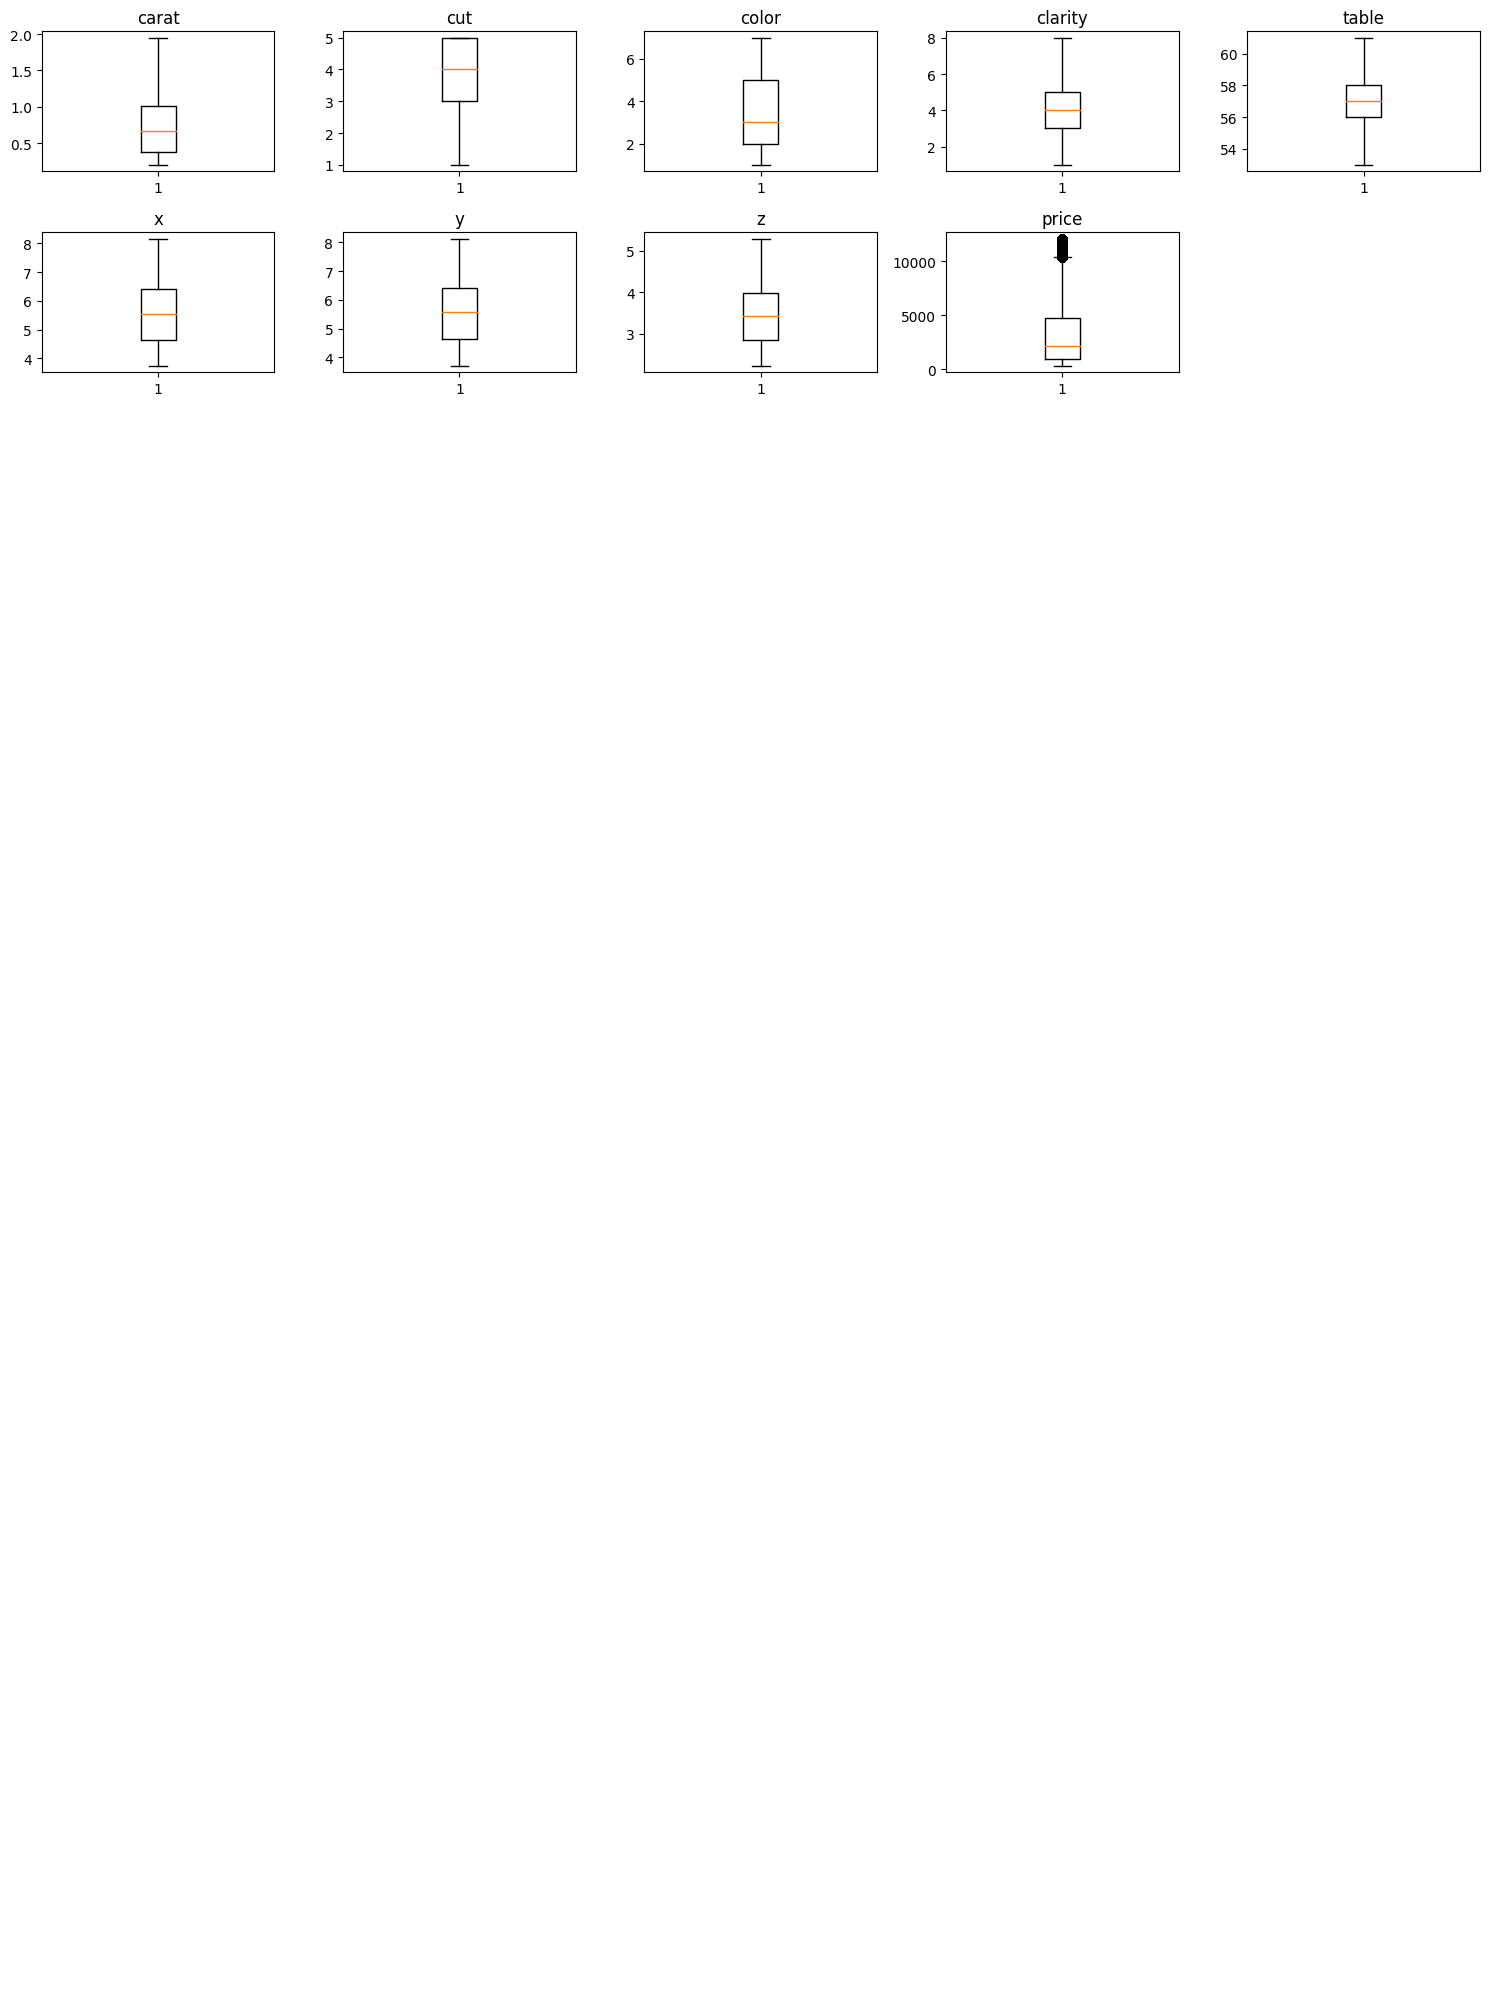

In [ ]:
numerical_cols=df.columns[df.dtypes !='object']
print(numerical_cols)

fig, axes = plt.subplots(10, 5, figsize=(15, 20))
axes = axes.flatten()
# Creating boxplot
for i, column in enumerate(numerical_cols):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Removing the unused plots
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

MODEL EVALUATION

In [ ]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [ ]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

# Numerical Pipeline
num_pipeline = Pipeline(
                steps = [
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
                ]
            )

# Categorical Pipeline
cat_pipeline = Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('ordinal_encoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
                ('scaler',StandardScaler())
                ]
            )

preprocessor = ColumnTransformer(
                [
                ('num_pipeline',num_pipeline,numerical_cols),
                ('cat_pipeline',cat_pipeline,categorical_cols)
                ]
            )

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
xtrain.head()

,carat,cut,color,clarity,table,x,y,z
140337,0.32,3,5,5,56.0,4.37,4.42,2.70
17628,0.33,5,2,7,55.0,4.45,4.47,2.76
12220,0.41,5,3,7,54.0,4.76,4.79,2.97
148844,0.39,5,1,2,57.0,4.73,4.70,2.89
120281,1.55,5,5,4,56.0,7.47,7.42,4.58


In [ ]:
xtest.head()

,carat,cut,color,clarity,table,x,y,z
40627,0.50,5,4,6,56.0,5.16,5.13,3.13
47587,1.01,3,4,3,59.0,6.36,6.33,3.99
172475,0.90,4,4,3,58.0,6.15,6.18,3.86
30189,0.81,4,4,3,59.0,6.00,5.94,3.68
36759,1.01,3,1,3,58.0,6.50,6.46,3.92


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),


}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain, ytrain.values.flatten()) # Train model

    # Make predictions
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 738.1665
- Mean Absolute Error: 506.9268
- R2 Score: 0.9298
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 737.9034
- Mean Absolute Error: 508.1590
- R2 Score: 0.9299




From here we can see the model will 92.9 % accurately determine the price of the gemstone